##Introduction to the problem and the data

In the telecom industry, competition is growing everyday.A major problem Telco are facing is that customers are not opting to nremain loyal.The term "churn" is widely described **as the process of customers switching from one firm to another in a given stipulated time**. Telecom management and analysts are finding the explanations behind customers leaving subscriptions and behavior activities of the holding churn customers’ data. This notebook  uses classification techniques to find out the leave subscriptions and collects the reasons behind the leave subscription of customers in the telecom industry. The major goal of this notebook is to analyze the diversified machine learning algorithms which are required to develop customer churn prediction models,to interpret customer churn behavior and identify churn reasons in order to give them with retention strategies and plans.

The dataset being used for this study is Cell2Cell dataset from the Teradata center for customer relationship management at Duke University obtained from kaggle website.

## Loading the Libs and the Data (And Getting to Know our Data)

In [29]:
# Importing general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler,  PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE

## Model Selection and Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


# Machine Learning Models
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [31]:
df=pd.read_csv('/content/cell2celltrain.csv')

In [32]:
df.head(1)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.0,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No


##Preliminary Processing

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [25]:
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


### Insights from Basic Data Analysis:
1. We have around 51k observations and a number of columns have missing values, we will explore these further and determine the missingneess characteristic and treat them accordingly.
2. We  have some features that are categorical data and some are numerical
3. Churn is a discrete variable (classification problem) - We will explore the distribution of the target variable.
4. We have some extra features which are not relevent for building a machine learning model (need to remove them) - Like Customer ID

In [34]:
# Remove extraneous columns
df.drop(['CustomerID'], axis=1, inplace=True)

# Separating the numerical variables from the categorical variables, in case we need to treat them separately
cat_var=df.select_dtypes(include=[object])

In [35]:
num_var = df.select_dtypes(include=['float','int'])
num_var.head(1)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,24.0,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0


In [36]:
cat_var.head(1)

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No


##EDA

Text(0.5, 1.0, 'Missing Values Heatmap')

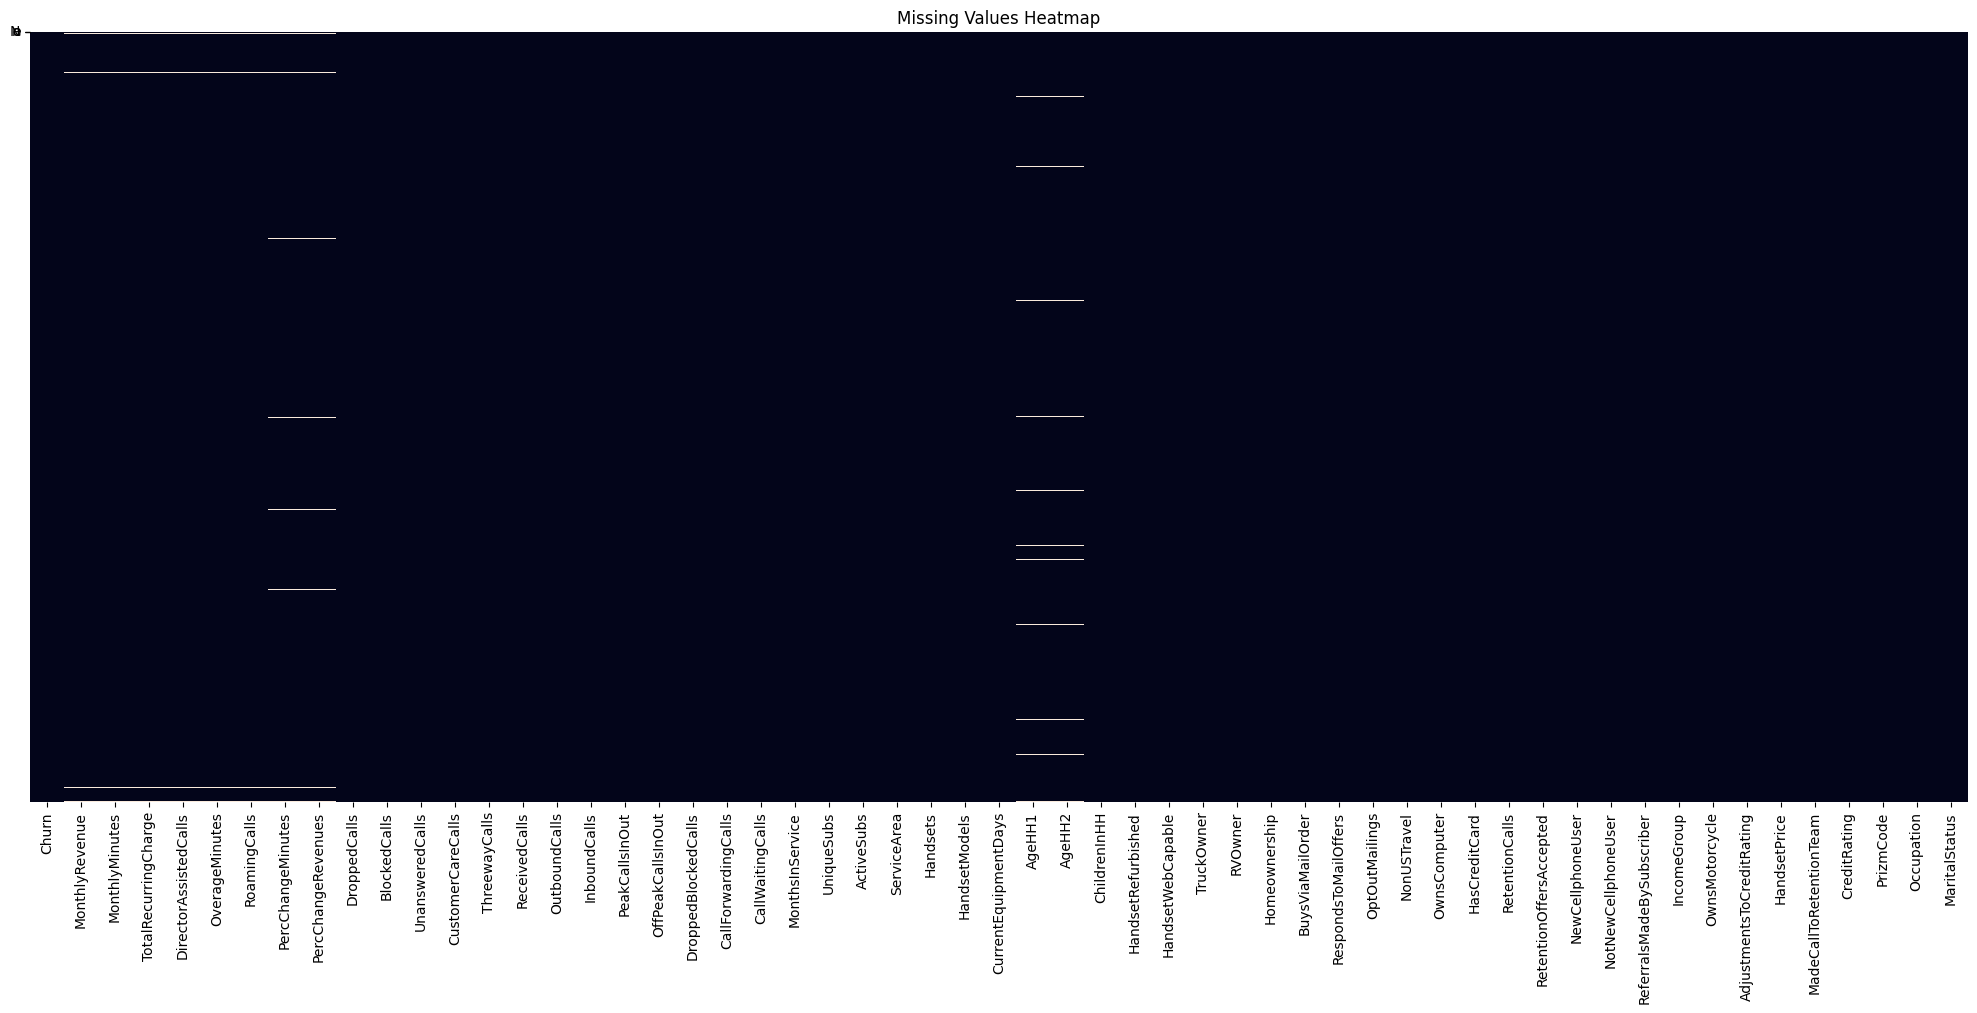

In [9]:
## Start by exploring missingness
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

**Deductions/ Insights**
#The missing values are in the numerical colums and impute with mean

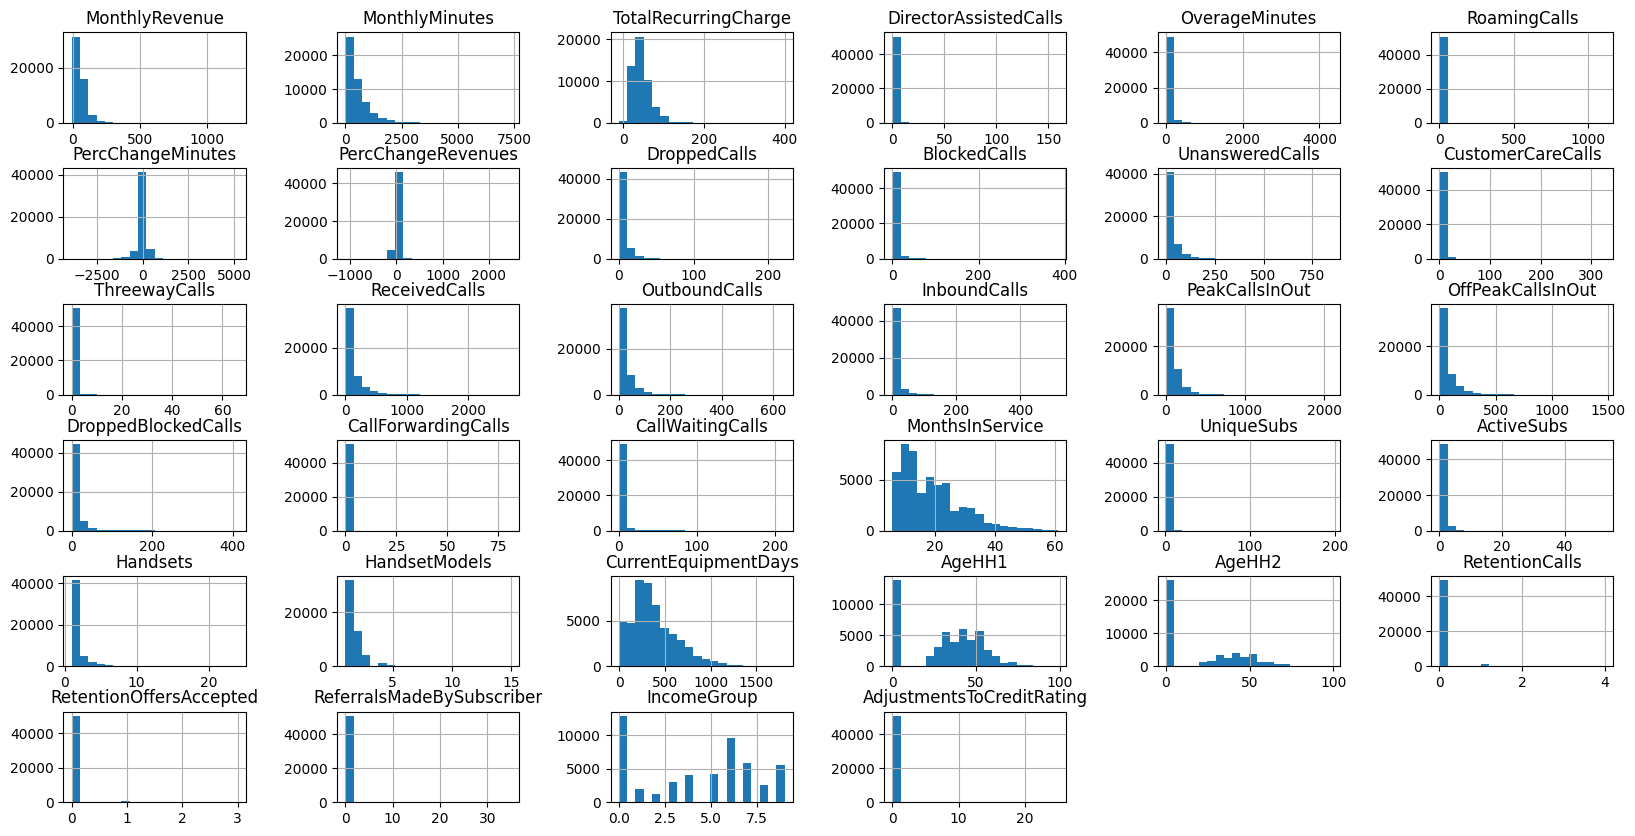

In [31]:
#3.2 Explore The Distribution in the Data

df.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

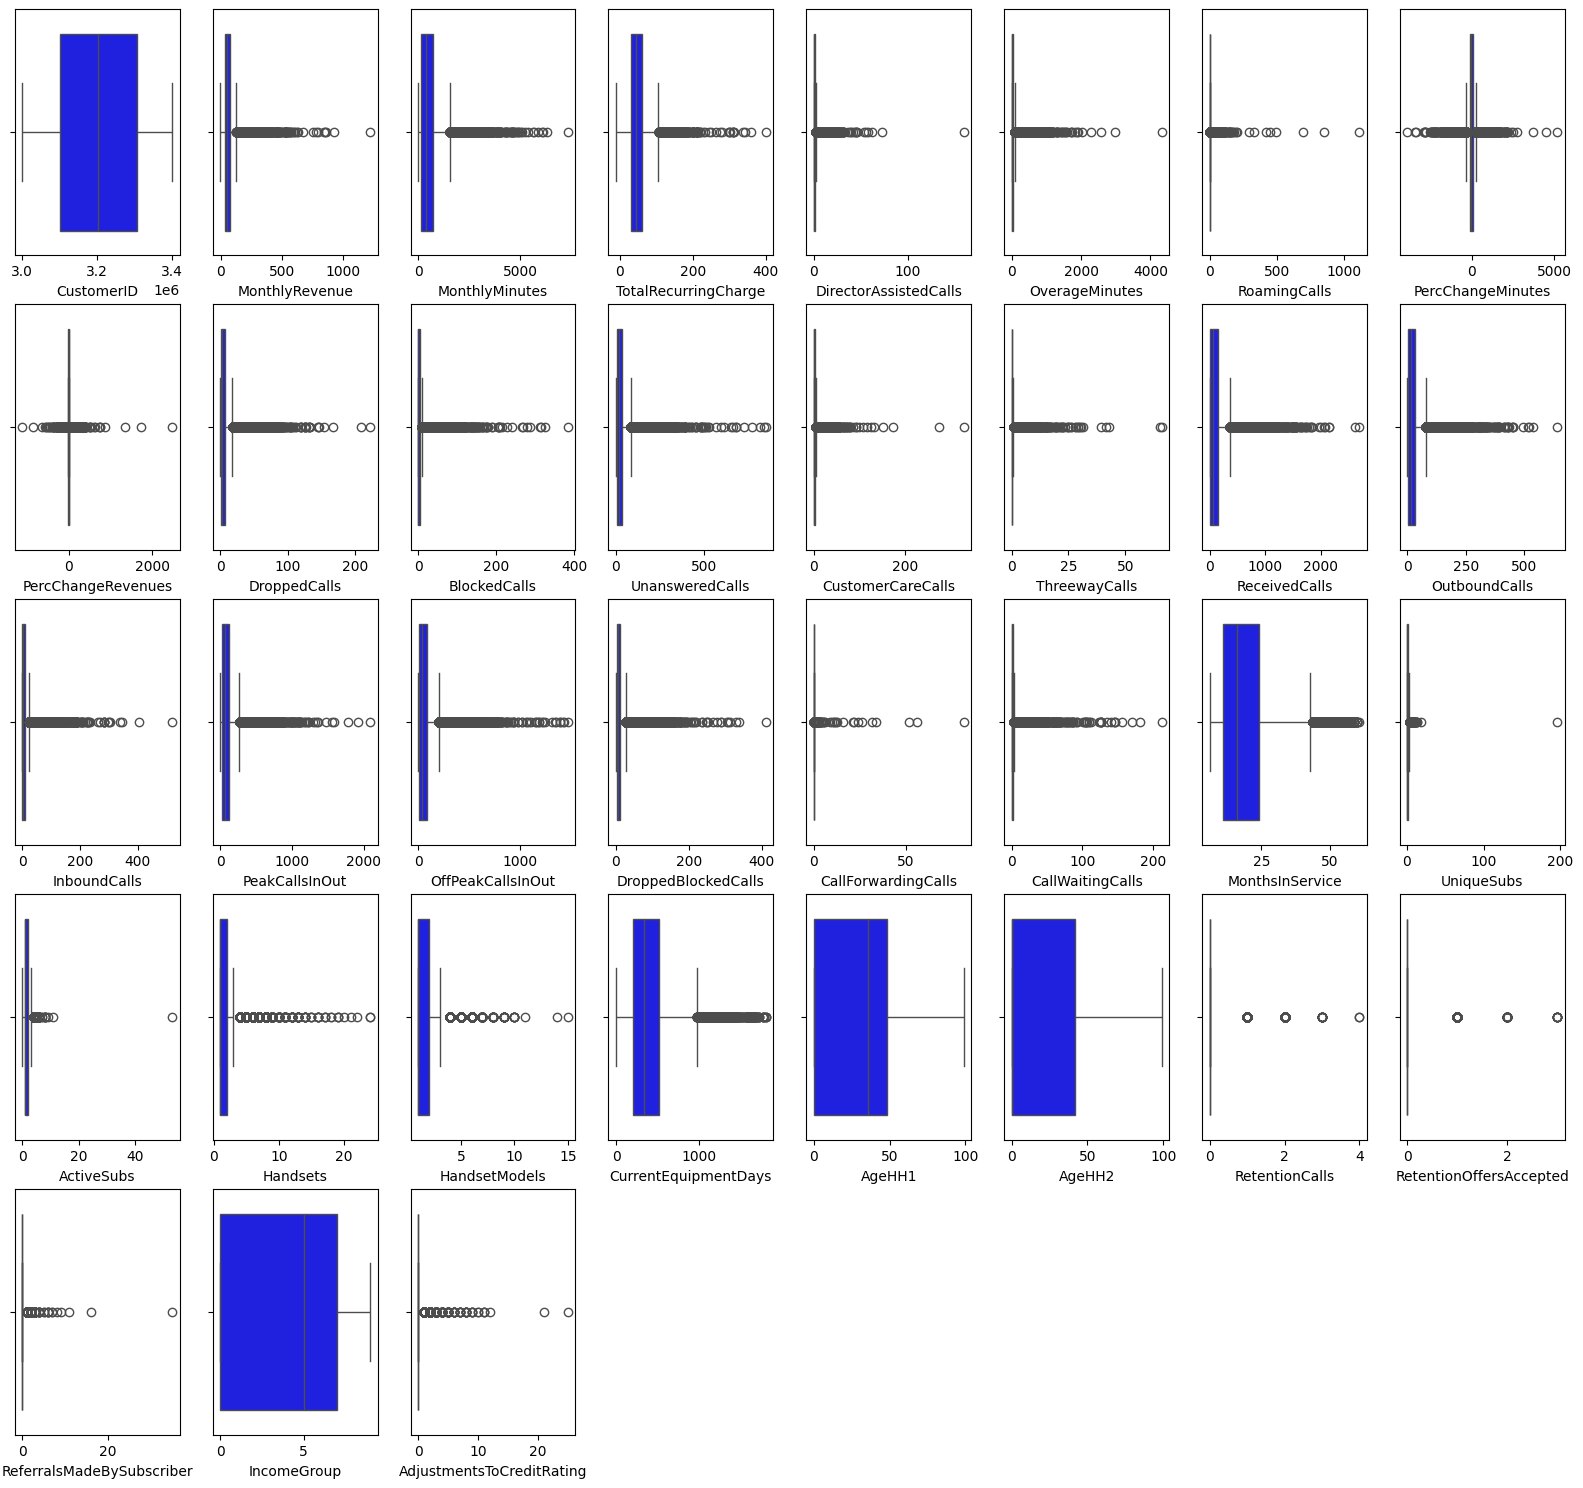

In [ ]:
## Explore presecence of outliers
# Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers.
fig = plt.figure(figsize=(20,30))
for i,j in zip(num_var,range(len(num_var.columns))):
    ax = fig.add_subplot(8,8, j+1)
    sns.boxplot(data=df,x=df[i],orient='v',color="Blue")

### Insights from Exploratory Data Analysis:
1. Most of the numerical variables have outliers
2. **Inituition:** We will need a model that is to outliers or may need to treat the outliers, before modelling

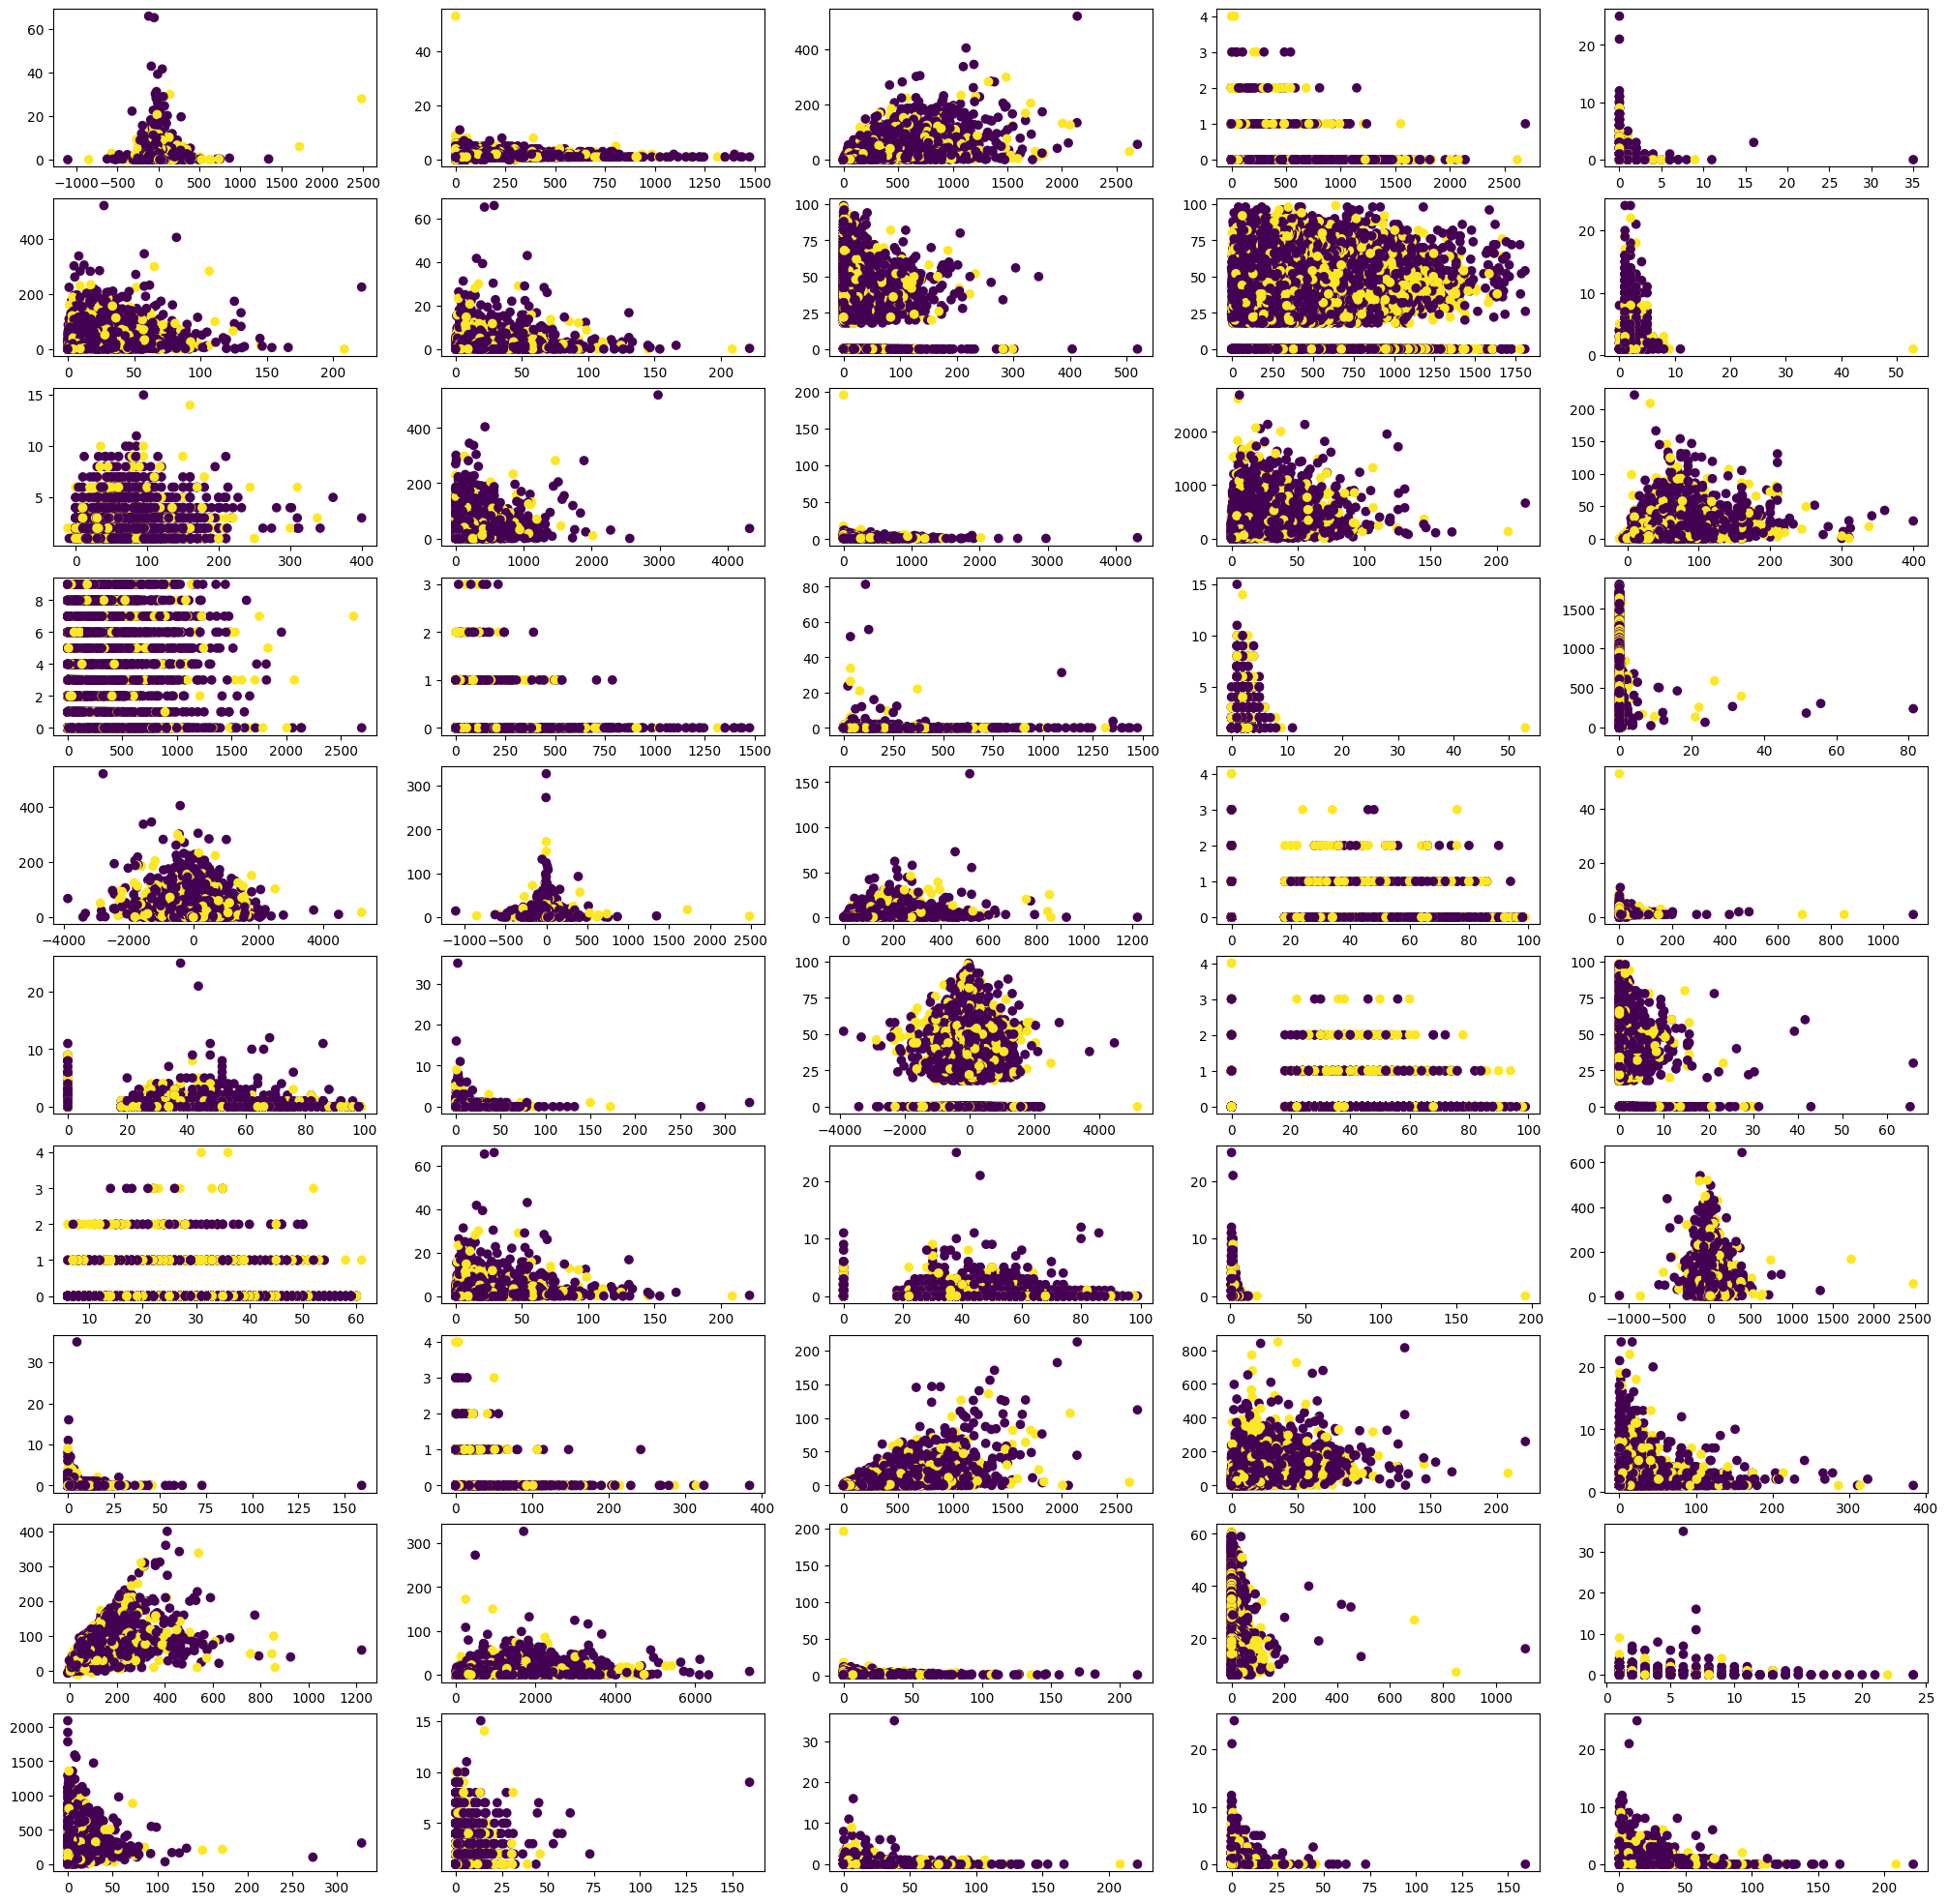

In [37]:
### Linear Seperability

#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(num_var.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) #Randomly choose 50 bivariate relationships to visualise. Total bivariate relationships (465 = 30C2) is too much
df['Churn'] = df['Churn'].replace(['Yes', 'No'], [1, 0]) # Convert our tarrget variable to categorical because it is classification.

fig = plt.figure(figsize=(30,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(num_var[num_var.columns[rand[i][0]]],num_var[num_var.columns[rand[i][1]]],c=df.Churn)


### Insights / Deduction
1. Most data features are not linearly separable for the classification problem as seen from bivariate scatter plots
2. **Inituition:** Support Vector Machines and Ensemble Methods would probably be the models for this data as they can work non-linear separations

Text(0.5, 1.0, 'Ratio of Customers Who Didnt Churn and Who did')

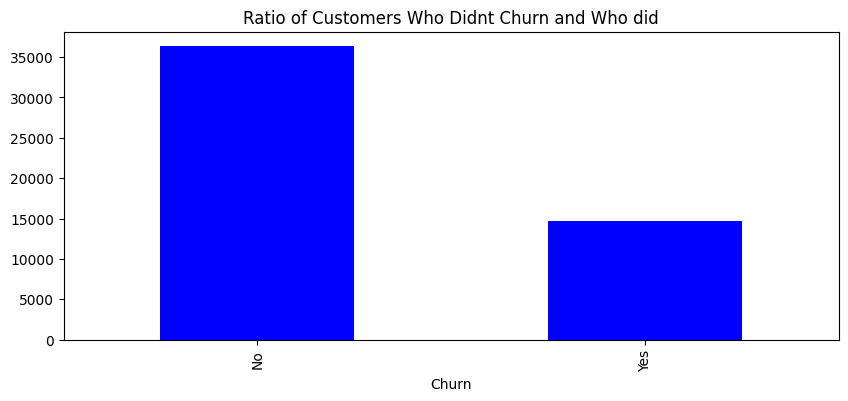

In [37]:
### Class Imbalance/Lack of it thereof.
df.Churn.value_counts().plot(kind = "bar", figsize = (10,4),color='Blue')
plt.title("Ratio of Customers Who Didnt Churn and Who did")

### Insights
- Approximately 30% of Customers Churned.
- This is a classic case of class imbalance - We are going to generate synthetic data to compensate for the minority class using the SMOTE algo.
- We will also try other methods of class imbalance handling - i.e random oversampling of the minority class, randomg undersampling of the majority class and we will check how this afffects the model performance.

## Data Prep

In [38]:
## Missing values
# For columns with more than 50% missing we are going to delete
df.dropna(thresh=df.shape[0]*0.5,axis=1, inplace = True)

## For other colums we are doing a mean for nume and mode for the cat
fill = dict()

for i in range(len(df.columns)):

    if df.columns[i] in num_var:
        fill[df.columns[i]] = df[df.columns[i]].mean()

    else:
        fill[df.columns[i]] = str(df[df.columns[i]].mode()).split()[1]

print(len(fill))
df = df.fillna(value=fill)

57


Text(0.5, 1.0, 'Missing Values Heatmap')

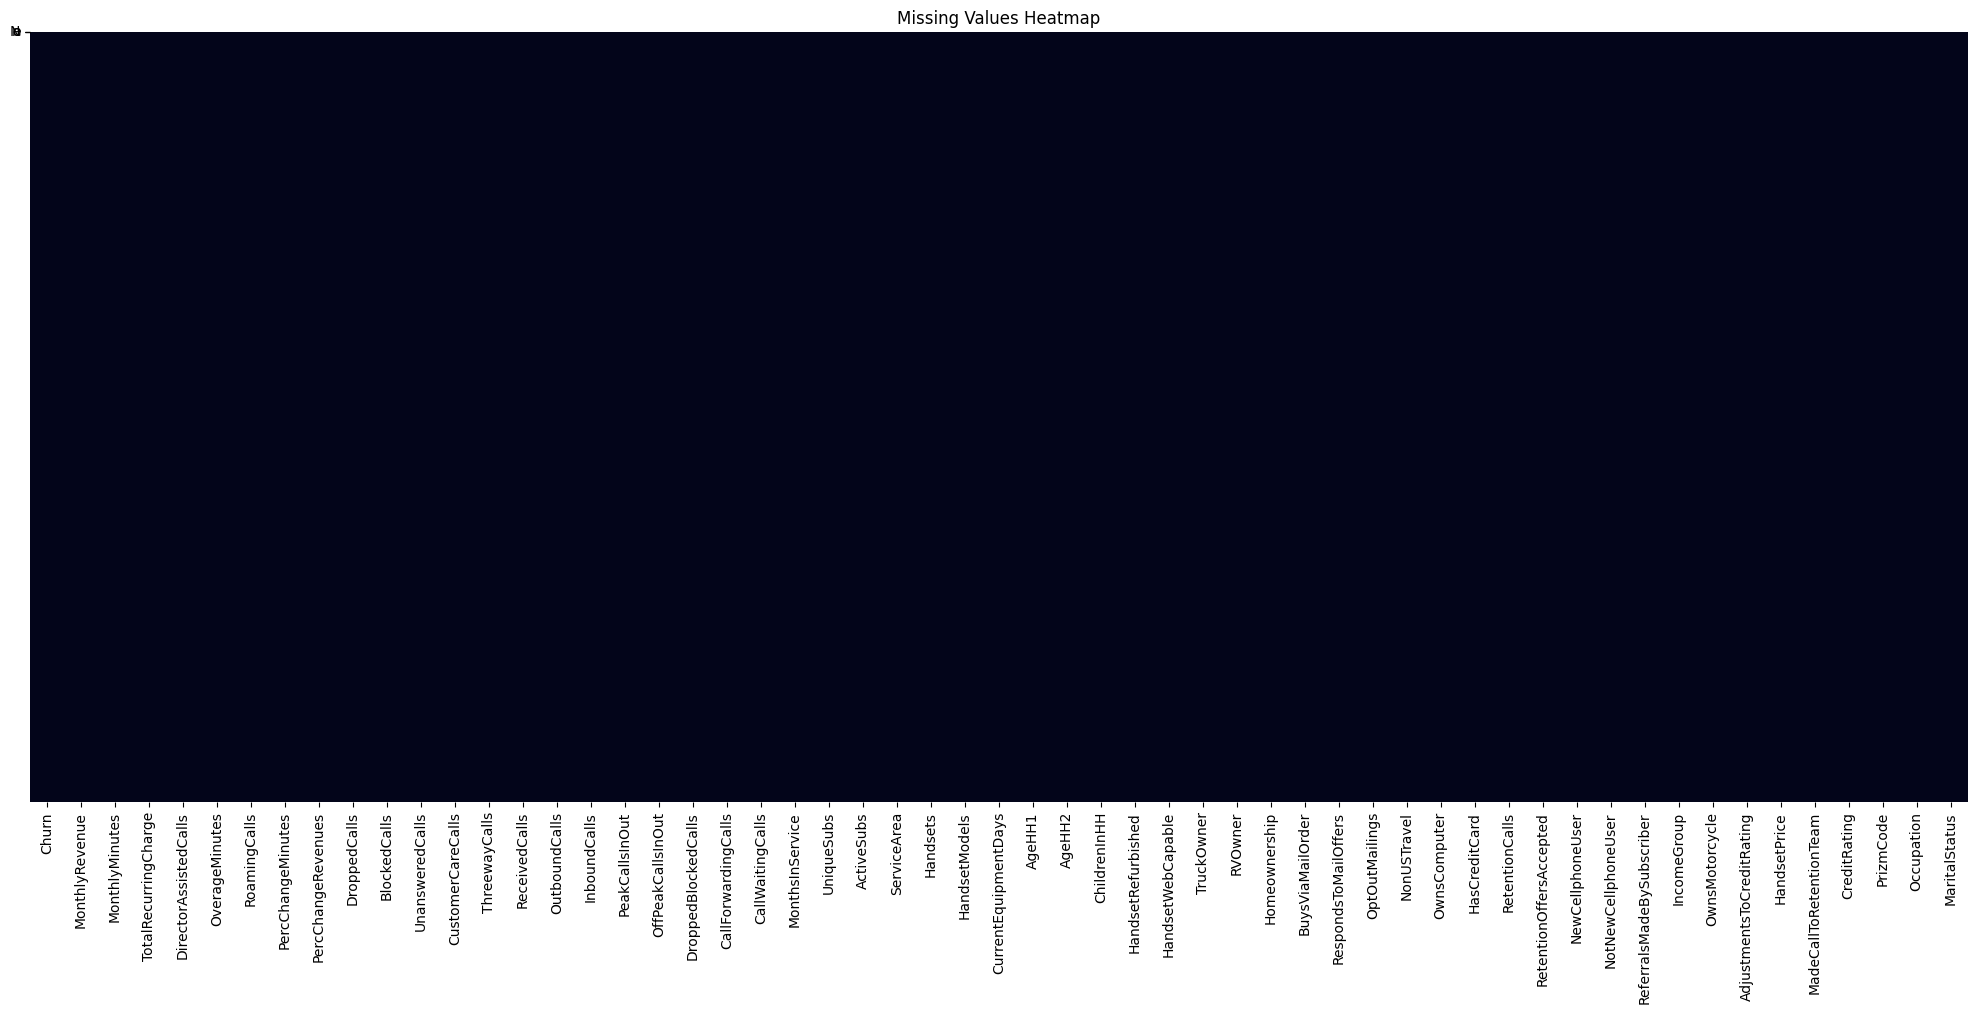

In [39]:
## Confirm if missingness has been taken care of
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [40]:
df.Churn

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51047, dtype: object

In [41]:
## Encoding
# Label Binarization
lb = LabelBinarizer()
for col in cat_var.columns:
    df[col] = lb.fit_transform(df[col])



# Separate the label from the features
X= [x for x in df.columns if x != 'Churn']
y = df['Churn']

X = df[X]
print(X.shape,y.shape)

(51047, 56) (51047,)


In [48]:
cat_var

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,1-Highest,Suburban,Other,Yes
51043,No,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,3-Good,Other,Other,No
51044,Yes,LAXCDG310,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,80,No,5-Low,Other,Clerical,No
51045,No,NEVPOW619,Yes,No,Yes,No,No,Unknown,No,No,...,No,No,No,No,30,No,5-Low,Other,Other,No


## Model Selection

In [42]:
## Class Imbalance
# Smote - Synthetic Minority Oversampling Technique

smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
x_res, y_res=smote_sample.fit_resample(X,y)



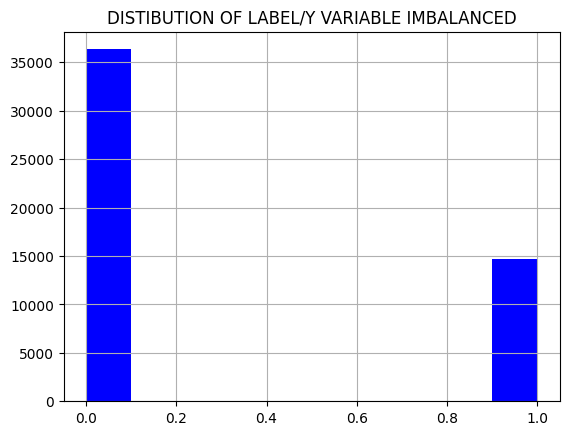

Text(0.5, 1.0, 'DISTIBUTION OF LABEL/Y VARIABLE BALANCED')

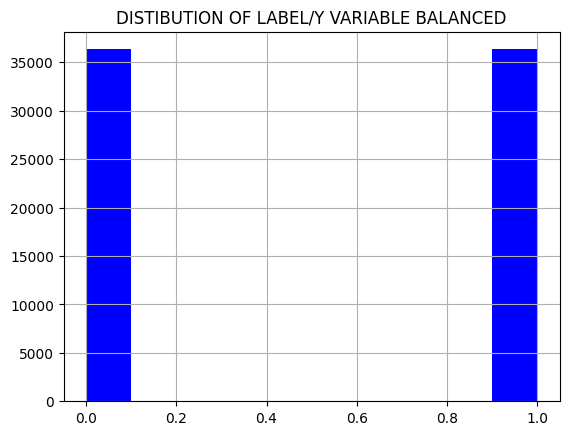

In [43]:
# Showing the diferences between balanced and imbalanced data
y.hist(color = 'Blue')
plt.title('DISTIBUTION OF LABEL/Y VARIABLE IMBALANCED')
plt.show()

y_res.hist(color = 'Blue')
plt.title('DISTIBUTION OF LABEL/Y VARIABLE BALANCED')

In [44]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50870, 56) (21802, 56) (50870,) (21802,)


In [45]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.57283271 0.58403774 0.57352074 0.59740515 0.59986239] 0.5855317475919009


In [47]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.7773737  0.77707883 0.78494201 0.77806173 0.7821899 ] 0.7799292313740909


## Model Evaluation and Error Analysis

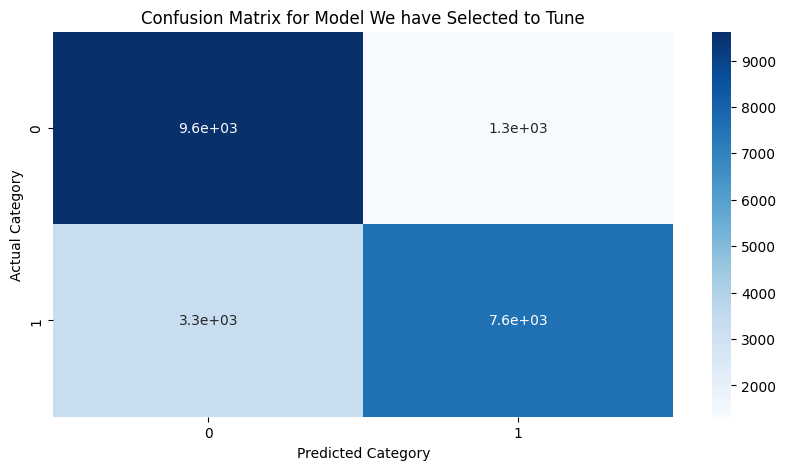

array([[9621, 1326],
       [3279, 7576]])

In [49]:
# Investigating whether class imbalance has impacted our models.
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix

## Model Hyperparameter Tuning